# BUSA8001 - Programming Task 3  

**Assignment Points**: 100    
**Assignment Weight**: 10%   
**Due Date**: Friday of Week 11 at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters  
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   

1. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. I recommend writing the report in Word, and then save it as a PDF file which will be submitted.
2. Your Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers. Include comments.  

**ID**	*numerical*	 Shows a unique identificator of a customer.
			
**Sex**	*categorical* Biological sex (gender) of a customer. In this dataset there are only 2 different options.
- 0:	male
- 1:	female
			
**Marital status**	*categorical* Marital status of a customer.
- 0:	single
- 1:	non-single (divorced / separated / married / widowed)
			
**Age**	*numerical*	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset
- 18	Min value (the lowest age observed in the dataset)
- 76	Max value (the highest age observed in the dataset)
			
**Education** *categorical*	Level of education of the customer
- 0:	other / unknown
- 1:	high school
- 2:	university
- 3:	graduate school
			
**Income**	*numerical*  Self-reported annual income in US dollars of the customer.
- 35832	Min value (the lowest income observed in the dataset)
- 309364	Max value (the highest income observed in the dataset)
			
**Occupation**	*categorical* Category of occupation of the customer.
- 0:	unemployed / unskilled
- 1:	skilled employee / official
- 2:	management / self-employed / highly qualified employee / officer
			
**Settlement size**	*categorical* The size of the city that the customer lives in.
- 0:	small city
- 1:	mid-sized city
- 2:	big city

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file 
df = pd.read_csv('data/data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
#for numerical columns
numeric = df[['Age','Income']]
numeric.describe()

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


Let’s move on with our data exploration and have a look at the pairwise correlation of variables. Correlation describes the linear dependency between variables and it ranges from -1 to +1. Where +1 indicates a very strong positive correlation and -1 indicates a strong negative correlation. A correlation of 0 means these two variables are not linearly dependent

In [5]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


The diagonal values in the correlation matrix are always one because it represents the correlation of a variable with itself.
Unfortunately, it’s hard to get a general understanding of the relationships between the variables by simply looking at numbers. So let’s plot these numbers in a heat map with Seaborn.

<ipython-input-6-98c666a59c49>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


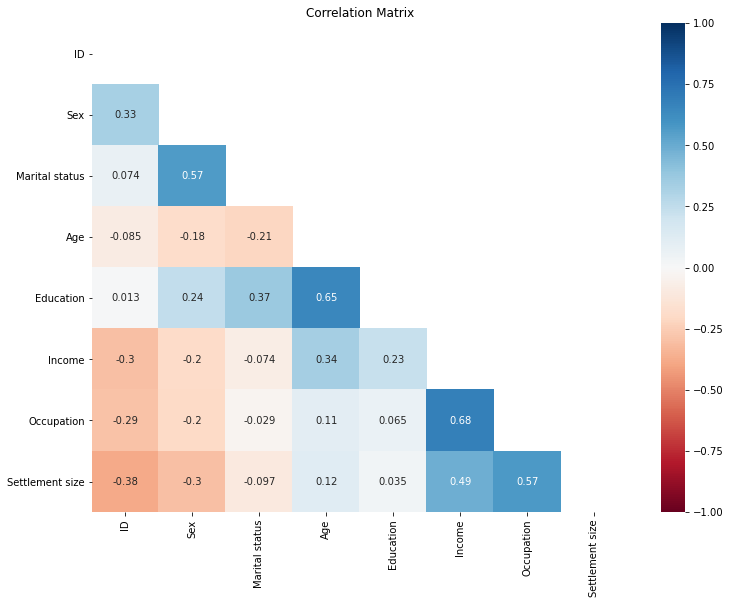

In [6]:
plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
s = sns.heatmap(df.corr(),
                annot=True,
                mask=mask,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.savefig('images/10.jpg', dpi=300, 
            bbox_inches='tight')
plt.show()

With this heat map, we see that there is a strong positive correlation between age and education or between occupation and income. These inter-variable correlations will be important in the feature selection of the segmentation process.

To understand the pairwise relationship between variables we can use a scatter plot. In the Deepnote notebook, you’ll find examples of scatter plots.

In [7]:
categorical = df.iloc[:, [1,2,4,6,7]]

for col in categorical:
    print('\nFrequency of Categories for variable %s'%col)
    print(df[col].value_counts())


Frequency of Categories for variable Sex
0    1086
1     914
Name: Sex, dtype: int64

Frequency of Categories for variable Marital status
0    1007
1     993
Name: Marital status, dtype: int64

Frequency of Categories for variable Education
1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

Frequency of Categories for variable Occupation
1    1113
0     633
2     254
Name: Occupation, dtype: int64

Frequency of Categories for variable Settlement size
0    989
1    544
2    467
Name: Settlement size, dtype: int64


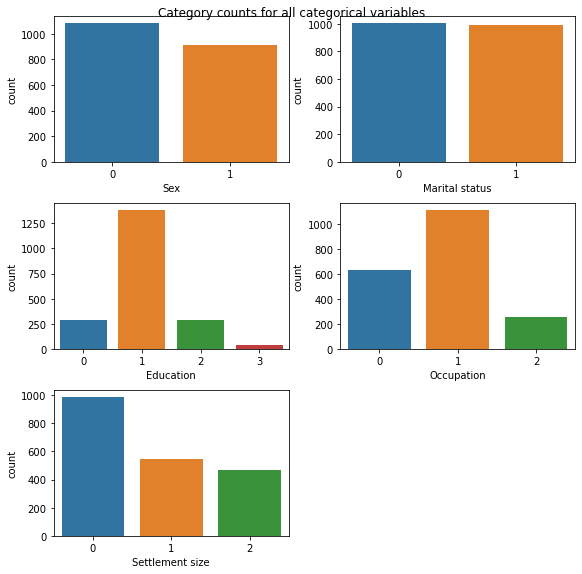

In [8]:
plt.figure(figsize=(8, 8))

for i, col in enumerate(categorical):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, ax=ax)

plt.suptitle('Category counts for all categorical variables')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('images/01.jpg', dpi=600)
plt.show()

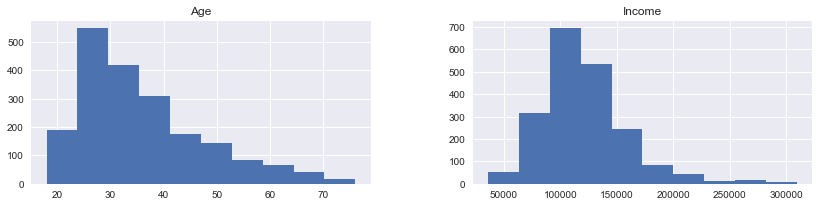

In [9]:
# check data distribution
plt.style.use('seaborn')
df.iloc[:, [3,5]].hist(figsize = (14,3))
plt.savefig('images/2.jpg', dpi=300, 
            bbox_inches='tight')
plt.show()

In [6]:
# drop unnecessary attributes
df1 = df.drop(columns= 'ID')
df1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


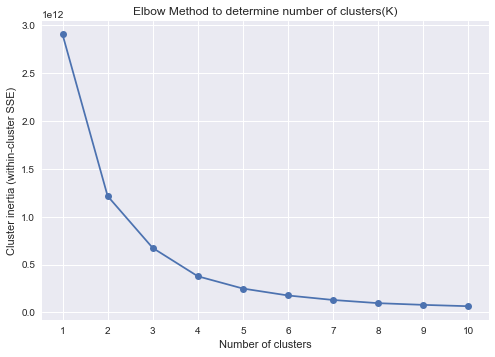

In [13]:
#finding optimal number of customer segments
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,  
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df1)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.title('Elbow Method to determine number of clusters(K)')
plt.savefig('images/02.jpeg', dpi=300)
plt.show()

4 best one, after 4 not much to gain, 2 is sub-optimal, leap from 2 to 3 is big. k going from 1 to 10 on x-axis. and y-axis has SSE (sum of squared error). We observe that as we increase number of clusters, it will decrease the error. 4 is like an elbow and is a good cluster number.

### 1. K-means clustering

In [12]:
km = KMeans(n_clusters=4, 
            init='random',  
            n_init=10,      
            max_iter=300,   
            random_state=0)

df1['label_km'] = km.fit_predict(df1)

print(df1['label_km'])
print(f'\nClusters:\n {km.cluster_centers_}') 

0       3
1       1
2       0
3       1
4       1
       ..
1995    3
1996    3
1997    0
1998    3
1999    0
Name: label_km, Length: 2000, dtype: int32

Clusters:
 [[5.44147844e-01 5.15400411e-01 3.22012320e+01 8.95277207e-01
  7.92328234e+04 1.58110883e-01 1.68377823e-01]
 [3.03296703e-01 4.35164835e-01 4.09406593e+01 1.19340659e+00
  1.54237231e+05 1.24835165e+00 1.23516484e+00]
 [2.85714286e-01 4.00000000e-01 4.45904762e+01 1.34285714e+00
  2.25124867e+05 1.77142857e+00 1.46666667e+00]
 [5.04721931e-01 5.26757608e-01 3.44449108e+01 1.00314795e+00
  1.14907033e+05 8.28961175e-01 7.13536201e-01]]


In [38]:
dfa = df1.groupby('label_km').agg({'Age':[pd.Series.median, 'min', 'max']})
dfa

Age        
                  median min max
label_km                        
Emergent              38  20  76
Standard shoppers     32  18  74
Well-Established      43  21  75
Working Class         29  19  74

In [39]:
dfi = df1.groupby('label_km').agg({'Income':[pd.Series.median, 'min', 'max']})
dfi

Income                
                     median     min     max
label_km                                   
Emergent           152267.0  134794  189166
Standard shoppers  114262.0   97115  134467
Well-Established   214732.0  189896  309364
Working Class       81838.5   35832   97006

In [40]:
df1_mode = categorical.groupby(df1['label_km']).agg(pd.Series.mode)
df1_mode['Count'] = df1[['label_km', 'Sex']].groupby('label_km').count()
df1_mode

,Sex,Marital status,Education,Occupation,Settlement size,Count
label_km,,,,,,
Emergent,0,0,1,1,1,455
Standard shoppers,1,1,1,1,0,954
Well-Established,0,0,2,2,2,105
Working Class,1,1,1,0,0,486


In [16]:
df1[df1['label_km']==0]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label_km
2,0,0,49,1,89210,0,0,0
13,0,0,60,2,89374,0,0,0
15,1,1,32,1,88428,0,0,0
22,0,0,48,1,89804,0,0,0
25,0,0,36,1,71909,0,0,0
...,...,...,...,...,...,...,...,...
1987,0,0,25,0,66628,0,0,0
1990,1,1,31,1,78758,0,0,0
1993,1,0,38,1,87670,0,0,0
1997,0,0,31,0,86400,0,0,0


In [37]:
#renaming clusters by being respectful and trying not be offensive
df1['label_km'] = df1['label_km'].map({
    0: 'Working Class',
    1: 'Emergent',
    3: 'Standard shoppers',
    2: 'Well-Established'
})

In [18]:
group_0= df1[df1['label_km']==0]
cat = group_0.iloc[:, [0,1,3,5,6]]

for col in cat:
    print('\nFrequency of Categories for variable %s'%col)
    print(cat[col].value_counts(normalize=True))
    
#actual frequency not probablity


Frequency of Categories for variable Sex
1    0.54321
0    0.45679
Name: Sex, dtype: float64

Frequency of Categories for variable Marital status
1    0.514403
0    0.485597
Name: Marital status, dtype: float64

Frequency of Categories for variable Education
1    0.730453
0    0.191358
2    0.069959
3    0.008230
Name: Education, dtype: float64

Frequency of Categories for variable Occupation
0    0.849794
1    0.144033
2    0.006173
Name: Occupation, dtype: float64

Frequency of Categories for variable Settlement size
0    0.890947
2    0.055556
1    0.053498
Name: Settlement size, dtype: float64


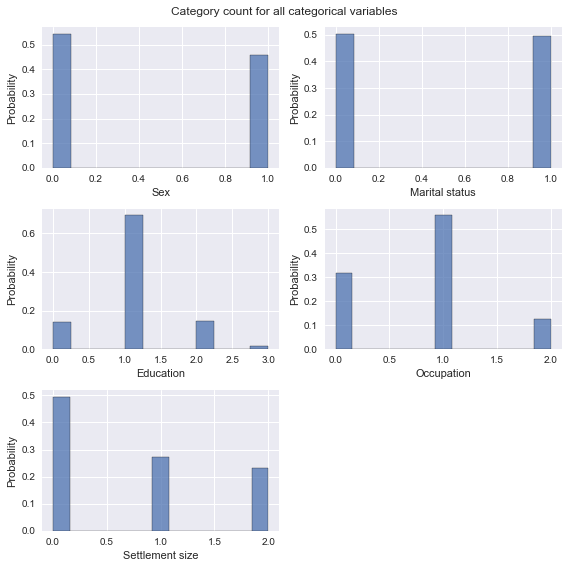

In [19]:
plt.figure(figsize=(8, 8))

for i, col in enumerate(cat):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(data=df1, x=col, ax=ax, stat='probability')

plt.suptitle('Category count for all categorical variables')
plt.savefig('images/101.jpg', dpi=600)
plt.tight_layout()
plt.show()

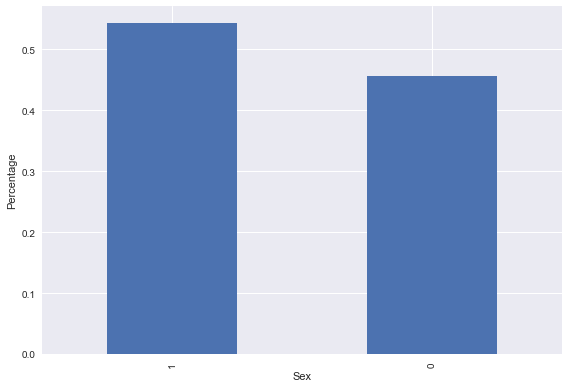

In [20]:
cat.Sex.value_counts(normalize=True).plot(kind='bar')
#plt.xticks((0, 1), ('Male','Female'),rotation = 0)
#df_labelkm['Marital status(Mode)'] = df_labelkm['Marital status(Mode)'].map({0: 'Single', 1:'Non-single'})
#df_labelkm['Occupation(Mode)'] = df_labelkm['Occupation(Mode)'].map({1: 'Skilled Employee/Official', 0: 'Unemployed/Unskilled',2: 'Management/Self-Employed/Highly Qualified Employee/Officer'})
#df_labelkm['Education(Mode)'] = df_labelkm['Education(Mode)'].map({1:'High School', 0: 'Other', 2:'University', 3:'Graduate School'})
#df_labelkm.iloc[:,6] = df_labelkm.iloc[:,6].map({0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'})
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.savefig('images/1001.jpg', dpi=600)
plt.tight_layout()
plt.show()

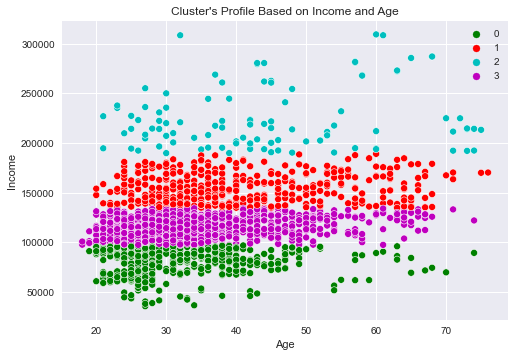

In [21]:
sns.scatterplot(data = df1,x=df1['Age'], y=df1['Income'],hue=df1['label_km'],palette=['g','r','c','m'])
plt.title("Cluster's Profile Based on Income and Age")
plt.legend()
plt.savefig('images/8.jpg', dpi=300, 
            bbox_inches='tight')
plt.show()

In [41]:
#see labels in occupation column
pd.set_option('display.max_colwidth', None)

#merging 3 dfs
df_labelkm = pd.merge(pd.merge(dfa,dfi,on='label_km'),df1_mode,on='label_km')

#dropping extra columns
df_labelkm = df_labelkm.drop(df_labelkm.iloc[:, 1:3],axis = 1)
df_labelkm = df_labelkm.drop(df_labelkm.iloc[:, 2:4],axis = 1)

#renaming columns
df_labelkm.rename(
    columns={
        'Sex': 'Sex(Mode)',
        'Marital status': 'Marital status(Mode)',
        'Education': 'Education(Mode)',
        'Occupation': 'Occupation(Mode)',
        'Settlement size': 'Settlement size(mode)'}, 
    index={'0':'F'},
    inplace = True) 

df_labelkm.columns.values[0] = 'Age(Median)'
df_labelkm.columns.values[1] = 'Income(Median)'

#column value replace 
df_labelkm['Sex(Mode)'] = df_labelkm['Sex(Mode)'].map({1:'Female', 0: 'Male'})
df_labelkm['Marital status(Mode)'] = df_labelkm['Marital status(Mode)'].map({0: 'Single', 1:'Non-single'})
df_labelkm['Occupation(Mode)'] = df_labelkm['Occupation(Mode)'].map({1: 'Skilled Employee/Official', 0: 'Unemployed/Unskilled',2: 'Management/Self-Employed/Highly Qualified Employee/Officer'})
df_labelkm['Education(Mode)'] = df_labelkm['Education(Mode)'].map({1:'High School', 0: 'Other', 2:'University', 3:'Graduate School'})
df_labelkm.iloc[:,6] = df_labelkm.iloc[:,6].map({0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'})

df_labelkm

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Age(Median),Income(Median),Sex(Mode),Marital status(Mode),Education(Mode),Occupation(Mode),Settlement size(mode),Count
label_km,,,,,,,,
Emergent,38,152267.0,Male,Single,High School,Skilled Employee/Official,Mid-sized City,455
Standard shoppers,32,114262.0,Female,Non-single,High School,Skilled Employee/Official,Small City,954
Well-Established,43,214732.0,Male,Single,University,Management/Self-Employed/Highly Qualified Employee/Officer,Big City,105
Working Class,29,81838.5,Female,Non-single,High School,Unemployed/Unskilled,Small City,486


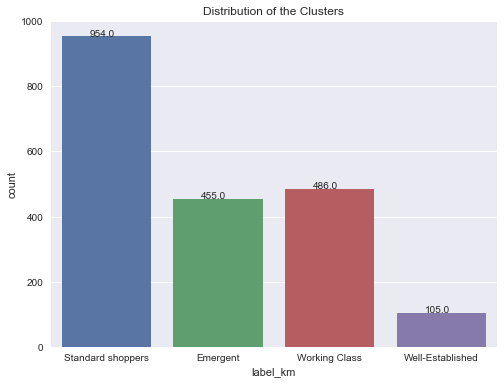

In [42]:
#Plotting countplot of clusters
plt.figure(figsize=(8, 6))

#Plotting countplot of clusters
ax = sns.countplot(x=df1['label_km'])
ax.set_title("Distribution of the Clusters")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('images/15.jpg', dpi=300)
plt.show()

### 2. Hierarchical clustering

In [7]:
from scipy.spatial.distance import pdist

pd.Series(pdist(df1, metric='euclidean')) 

0          26103.038846
1          35460.004653
2          46895.005182
3          24361.004064
4          20178.025523
               ...     
1998995    19776.000253
1998996    49328.000081
1998997    11568.002248
1998998    17984.001001
1998999    29552.000068
Length: 1999000, dtype: float64

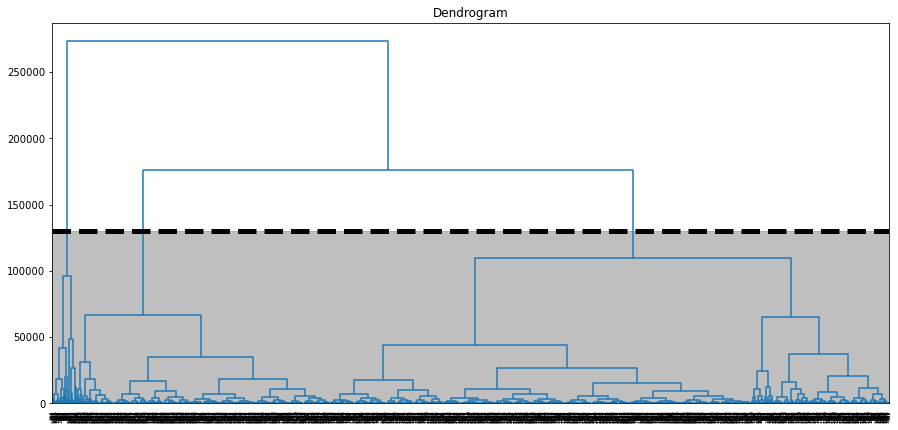

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
dist = pdist(df1, 'euclidean')
linkage_matrix = linkage(df1, method = 'complete')
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix, color_threshold=0,)
plt.title('Dendrogram')
plt.axhline(y=130000, c='black', lw=5, linestyle='dashed')
plt.axhspan(0,130000, alpha = 0.5, color="gray");
plt.savefig('images/4.jpg', dpi=300, 
            bbox_inches='tight')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(df1)
print('Cluster labels: %s' % labels)
df1['label_hc'] = labels

Cluster labels: [3 1 2 ... 2 2 2]


In [43]:
#renaming clusters by being respectful and trying not be offensive
df1['label_hc'] = df1['label_hc'].map({
    2: 'Working Class',
    1: 'Emergent',
    3: 'Standard shoppers',
    0: 'Well-Established'
})

In [44]:
dfa1 = df1.groupby('label_hc').agg({'Age':[pd.Series.median, 'min', 'max']})
dfa1

Age        
                  median min max
label_hc                        
Emergent            39.0  20  76
Standard shoppers   33.0  19  74
Well-Established    43.5  21  75
Working Class       28.0  18  74

In [45]:
dfi1 = df1.groupby('label_hc').agg({'Income':[pd.Series.median, 'min', 'max']})
dfi1

Income                
                     median     min     max
label_hc                                   
Emergent           164590.0  147259  212020
Standard shoppers  120160.0  102374  146716
Well-Established   235538.5  213333  309364
Working Class       86015.0   35832  102250

In [46]:
df1_mode1 = categorical.groupby(df1['label_hc']).agg(pd.Series.mode)
df1_mode1['Count'] = df1[['label_hc', 'Sex']].groupby('label_hc').count()
df1_mode1

,Sex,Marital status,Education,Occupation,Settlement size,Count
label_hc,,,,,,
Emergent,0,0,1,1,1,328
Standard shoppers,0,0,1,1,0,1009
Well-Established,0,0,2,2,2,60
Working Class,1,1,1,0,0,603


In [47]:
#merging 3 dfs
df_labelhc = pd.merge(pd.merge(dfa1,dfi1,on='label_hc'),df1_mode1,on='label_hc')

#dropping extra columns
df_labelhc = df_labelhc.drop(df_labelhc.iloc[:, 1:3],axis = 1)
df_labelhc = df_labelhc.drop(df_labelhc.iloc[:, 2:4],axis = 1)

#renaming columns
df_labelhc.rename(
    columns={
        'Sex': 'Sex(Mode)',
        'Marital status': 'Marital status(Mode)',
        'Education': 'Education(Mode)',
        'Occupation': 'Occupation(Mode)',
        'Settlement size': 'Settlement size(mode)'}, inplace = True) 
df_labelhc.columns.values[0] = 'Age(Median)'
df_labelhc.columns.values[1] = 'Income(Median)'

#column value replace 
df_labelhc['Sex(Mode)'] = df_labelhc['Sex(Mode)'].map({1:'Female', 0: 'Male'})
df_labelhc['Marital status(Mode)'] = df_labelhc['Marital status(Mode)'].map({0: 'Single', 1:'Non-single'})
df_labelhc['Occupation(Mode)'] = df_labelhc['Occupation(Mode)'].map({1: 'Skilled Employee/Official', 0: 'Unemployed/Unskilled',2: 'Management/Self-Employed/Highly Qualified Employee/Officer'})
df_labelhc['Education(Mode)'] = df_labelhc['Education(Mode)'].map({1:'High School', 0: 'Other', 2:'University', 3:'Graduate School'})
df_labelhc.iloc[:,6] = df_labelhc.iloc[:,6].map({0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'})

#rename index
df_labelhc = df_labelhc.rename(index={'O': 'Well-established'})

df_labelhc

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Age(Median),Income(Median),Sex(Mode),Marital status(Mode),Education(Mode),Occupation(Mode),Settlement size(mode),Count
label_hc,,,,,,,,
Emergent,39.0,164590.0,Male,Single,High School,Skilled Employee/Official,Mid-sized City,328
Standard shoppers,33.0,120160.0,Male,Single,High School,Skilled Employee/Official,Small City,1009
Well-Established,43.5,235538.5,Male,Single,University,Management/Self-Employed/Highly Qualified Employee/Officer,Big City,60
Working Class,28.0,86015.0,Female,Non-single,High School,Unemployed/Unskilled,Small City,603


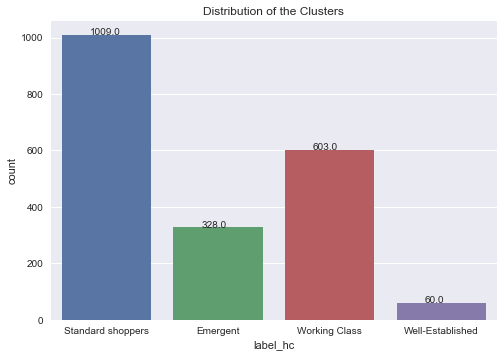

In [48]:
#Plotting countplot of clusters
ax = sns.countplot(x=df1['label_hc'])
ax.set_title("Distribution of the Clusters")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('images/5.jpg', dpi=300)
plt.show()

In [49]:
df1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label_km,label_hc
0,0,0,67,2,124670,1,2,Standard shoppers,Standard shoppers
1,1,1,22,1,150773,1,2,Emergent,Emergent
2,0,0,49,1,89210,0,0,Working Class,Working Class
3,0,0,45,1,171565,1,1,Emergent,Emergent
4,0,0,53,1,149031,1,1,Emergent,Emergent
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,Standard shoppers,Standard shoppers
1996,1,1,27,1,117744,1,0,Standard shoppers,Standard shoppers
1997,0,0,31,0,86400,0,0,Working Class,Working Class
1998,1,1,24,1,97968,0,0,Standard shoppers,Working Class


In [50]:
((df1['label_km']) == (df1['label_hc'])).value_counts()

True     1666
False     334
dtype: int64

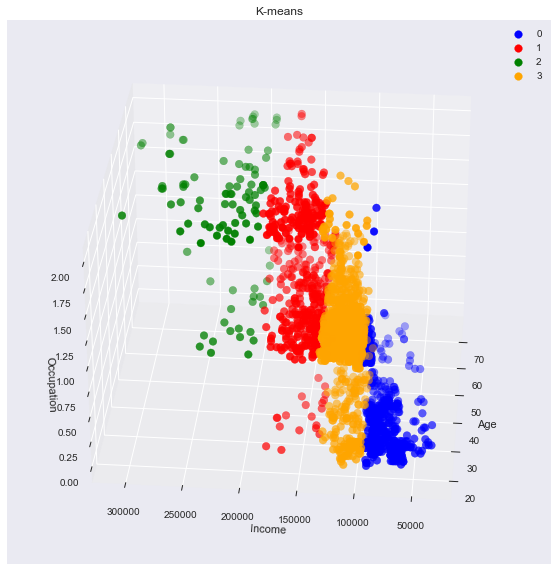

In [35]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

arr1=ax.scatter(df1.Age[df1.label_km == 0], df1.Income[df1.label_km == 0], df1['Occupation'][df1.label_km == 0], c='blue', s=60)
arr2=ax.scatter(df1.Age[df1.label_km == 1], df1.Income[df1.label_km == 1], df1['Occupation'][df1.label_km == 1], c='red', s=60)
arr3=ax.scatter(df1.Age[df1.label_km == 2], df1.Income[df1.label_km == 2], df1['Occupation'][df1.label_km == 2], c='green', s=60)
arr4=ax.scatter(df1.Age[df1.label_km == 3], df1.Income[df1.label_km == 3], df1['Occupation'][df1.label_km == 3], c='orange', s=60)

ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel("Occupation")
plt.legend([arr1, arr2, arr3, arr4], ['0','1','2','3'])
plt.title('K-means')
plt.savefig('images/6.jpg', dpi=300, 
            bbox_inches='tight')
plt.show()

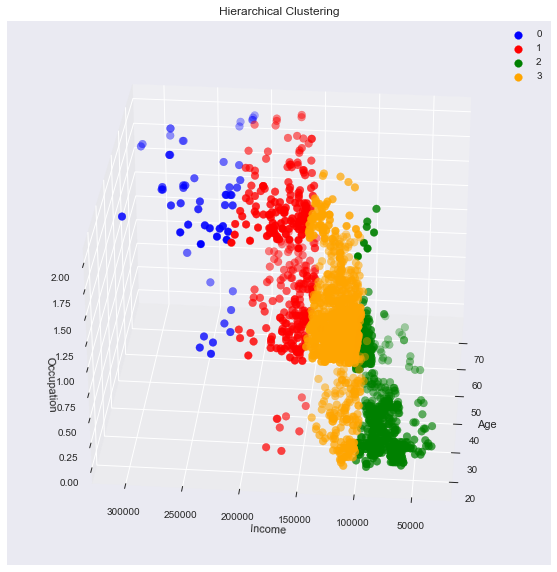

In [36]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

arr1=ax.scatter(df1.Age[df1.label_hc == 0], df1.Income[df1.label_hc == 0], df1['Occupation'][df1.label_hc == 0], c='blue', s=60)
arr2=ax.scatter(df1.Age[df1.label_hc == 1], df1.Income[df1.label_hc == 1], df1['Occupation'][df1.label_hc == 1], c='red', s=60)
arr3=ax.scatter(df1.Age[df1.label_hc == 2], df1.Income[df1.label_hc == 2], df1['Occupation'][df1.label_hc == 2], c='green', s=60)
arr4=ax.scatter(df1.Age[df1.label_hc == 3], df1.Income[df1.label_hc == 3], df1['Occupation'][df1.label_hc == 3], c='orange', s=60)

ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel("Occupation")
plt.legend([arr1, arr2, arr3, arr4], ['0','1','2','3'])
plt.title('Hierarchical Clustering')
plt.savefig('images/7.jpg', dpi=300, 
            bbox_inches='tight')
plt.show()